### 12장 다층 인공 신경망을 밑바닥부터 구현
- 12.1 인공 신경망으로 복잡한 함수 모델링
- 12.2 손글씨 숫자 분류
- 12.3 인공 신경망 훈련
- 12.4 신경망의 수렴
- 12.5 신경망 구현에 관한 몇 가지 첨언
--- 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
## MNIST dataset loading from sklearn 
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

## y값 : 0~9의 정수 
## X값 : 픽셀값이 0~255로 이루어져 있다. --> 보통 이미지 훈련을 위해서, 평균이 0이고 -1 ~ +1인 값으로 변환 
X, y = fetch_openml('mnist_784', version = 1, return_X_y = True)
y = y.astype(int)
X = ((X/255.) - .5) /2 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 10000, stratify = y, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [3]:
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
41086,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,...,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25
38747,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,...,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25
66359,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,...,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25
25244,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,...,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25
26820,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,...,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25


In [4]:
y_train.head()

41086    6
38747    9
66359    8
25244    1
26820    0
Name: class, dtype: int32

In [5]:
## df --> numpy array 변환 
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

X_train

array([[-0.25, -0.25, -0.25, ..., -0.25, -0.25, -0.25],
       [-0.25, -0.25, -0.25, ..., -0.25, -0.25, -0.25],
       [-0.25, -0.25, -0.25, ..., -0.25, -0.25, -0.25],
       ...,
       [-0.25, -0.25, -0.25, ..., -0.25, -0.25, -0.25],
       [-0.25, -0.25, -0.25, ..., -0.25, -0.25, -0.25],
       [-0.25, -0.25, -0.25, ..., -0.25, -0.25, -0.25]])

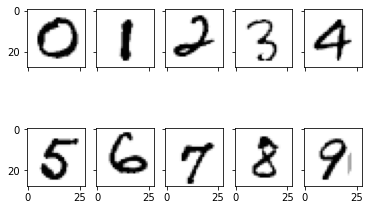

In [6]:
fig, ax = plt.subplots(nrows = 2, ncols = 5, 
                       sharex = True, sharey = True) ## x, y축을 공유 
ax = ax.flatten() # 다차원 배열 공간을 1차원으로 평탄화
for i in range(10): 
    img = X_train[y_train == i][0].reshape(28,28) ## 픽셀 데이터를 28x28로 변환 
    ax[i].imshow(img, cmap = 'Greys')
    
plt.show()

In [7]:
## 맨땅에 헤딩하기로 만든 DNN (NeuralNetMLP) 모듈 
## 학습을 위해 해보는 것임 --> 실전에서는 텐서플로, 케라스 사용 (chp 13 ~ )
from my_func.DNN import NeuralNetMLP

In [8]:
nn = NeuralNetMLP(n_hidden = 100,   ## hidden layers = 100개 
                  l2 = 0.01,        ## overfitting 방지를 위한 규제(L2)
                  epochs = 200,     ## 반복횟수 
                  eta = 0.0005,     ## 학습률 0~1
                  minibatch_size = 100, 
                  shuffle = True, seed = 1
                 )

In [9]:
nn.fit(X_train = X_train[:55000],
       y_train = y_train[:55000],
       X_valid = X_train[55000:],
       y_valid = y_train[55000:],
      )

200/200 | 비용: 12878.63 | 훈련/검증 정확도: 97.02%/96.02%  

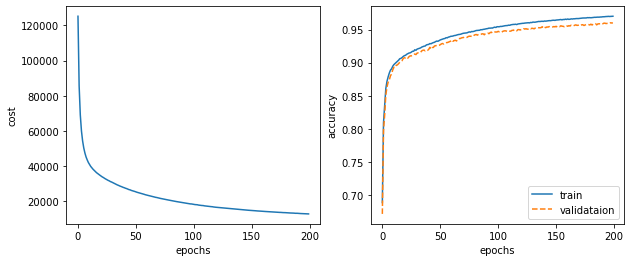

In [14]:
## 최적 epochs 찾기 
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)                
plt.plot(range(nn.epochs), nn.eval_['cost'])
plt.xlabel('epochs')
plt.ylabel('cost')

plt.subplot(1, 2, 2)                
plt.plot(range(nn.epochs), nn.eval_['train_acc'], label = 'train')
plt.plot(range(nn.epochs), nn.eval_['valid_acc'], label = 'validataion', linestyle = '--')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

- cost와 overfitting 측면에서 판단할때, epochs = 50 정도가 충분해 보임

In [17]:
## test dataset에 적용하여, 모형의 일반화 성능 파악 
y_test_pred = nn.predict(X_test)
acc = (np.sum(y_test == y_test_pred).astype(float) / X_test.shape[0])
acc

0.9633

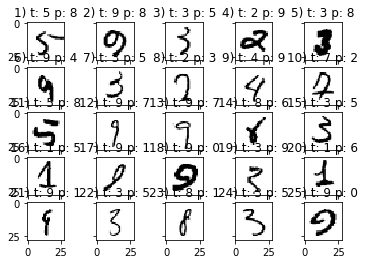

In [19]:
## 모형이 오분류한 이미지는 어떤 것들인지 확인? 
miscl_img = X_test[y_test != y_test_pred][:25]
correct_lab = y_test[y_test != y_test_pred][:25]
miscl_lab = y_test_pred[y_test != y_test_pred][:25]

fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(25):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d' % (i+1, correct_lab[i], miscl_lab[i]))

# plt.savefig('images/12_09.png', dpi=300)
plt.show()